In [2]:
from tqdm.auto import tqdm
import torchio as tio
import os
from scripts.utils import load_metadata, save_metadata

/home/ids/mahdi-22/M-M/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
metadata = load_metadata()
subjects_ids = list(metadata.index)

In [5]:
destination_dir = "Data/M&Ms/OpenDataset/"


for subject_id in tqdm(subjects_ids):
    try:
        ed_index, es_index, image_path, seg_path = metadata.loc[
            subject_id, ["ED", "ES", "Image_path", "Seg_path"]
        ]

        # centre = metadata.loc[subject_id, "Centre"]
        # print(centre)

        image = tio.ScalarImage(image_path)
        seg = tio.LabelMap(seg_path)

        # Only keep ED and ES
        image.set_data(image.data[[ed_index, es_index]])
        seg.set_data(seg.data[[ed_index, es_index]])


        # print("original")
        # subject = tio.Subject(image=image, mask=seg)
        # subject.plot()

        c, h, w, d = image.data.shape
        z_pixdim = image.spacing[2]

        # Resample to 1mm iso
        image = tio.Resample((2.8, 2.8, z_pixdim))(image)
        seg = tio.Resample((2.8, 2.8, z_pixdim))(seg)

        # print("resampled")
        # subject = tio.Subject(image=image, mask=seg)
        # subject.plot()

        # print("cropped")
        # # crop to 256, 256 and keep last dimension
        image = tio.CropOrPad((128, 128, d))(image)
        seg = tio.CropOrPad((128, 128, d))(seg)


        subject_dir = os.path.join(destination_dir, str(subject_id))
        os.makedirs(subject_dir, exist_ok=True)

        image.save(os.path.join(subject_dir, f"{subject_id}_sa.nii.gz"))
        seg.save(os.path.join(subject_dir, f"{subject_id}_sa_gt.nii.gz"))

        # # Show 3D image and mask with tio
        # subject = tio.Subject(image=image, mask=seg)
        # subject.plot()


    except:
        print(subject_id, " cannot be loaded and will be removed from metadata")
        metadata = metadata.drop(subject_id)
        save_metadata(metadata)
        continue    


100%|██████████| 305/305 [10:56<00:00,  2.15s/it]


In [13]:
metadata.head(10)

,VendorName,Vendor,Centre,ED,ES,Age,Pathology,Sex,Height,Weight,Image_path,Seg_path,time_dim,x_dim,y_dim,z_dim,x_pixdim,y_pixdim,z_pixdim
SubjectID,,,,,,,,,,,,,,,,,,,
A3B7E5,Philips,B,2,29,12,64,NOR,F,NaN,66.0,Data_original/OpenDataset/Training/Labeled/A3B...,Data_original/OpenDataset/Training/Labeled/A3B...,30,320,320,10,1.182432,1.182432,10.0
A3H1O5,Siemens,A,1,0,12,46,NOR,F,NaN,120.0,Data_original/OpenDataset/Training/Labeled/A3H...,Data_original/OpenDataset/Training/Labeled/A3H...,25,196,240,11,1.416667,1.416667,9.6
A3H5R1,GE,C,4,24,6,74,HHD,F,NaN,53.0,Data_original/OpenDataset/Testing/A3H5R1/A3H5R...,Data_original/OpenDataset/Testing/A3H5R1/A3H5R...,25,256,256,12,1.484400,1.484401,10.0
A3P9V7,Canon,D,5,27,13,79,HHD,F,160.0,64.0,Data_original/OpenDataset/Testing/A3P9V7/A3P9V...,Data_original/OpenDataset/Testing/A3P9V7/A3P9V...,28,220,192,12,1.822900,1.822900,10.0
A4A8V9,Philips,B,3,0,10,56,DCM,M,NaN,76.0,Data_original/OpenDataset/Testing/A4A8V9/A4A8V...,Data_original/OpenDataset/Testing/A4A8V9/A4A8V...,30,288,288,12,1.397059,1.397059,10.0
A4B5U4,Siemens,A,1,0,10,54,DCM,F,160.0,45.0,Data_original/OpenDataset/Training/Labeled/A4B...,Data_original/OpenDataset/Training/Labeled/A4B...,25,196,240,14,1.012500,1.012500,9.6
A4B9O6,Canon,D,5,0,11,81,Other,F,150.0,64.0,Data_original/OpenDataset/Testing/A4B9O6/A4B9O...,Data_original/OpenDataset/Testing/A4B9O6/A4B9O...,34,512,440,11,0.795500,0.795500,10.0
A4J4S4,Siemens,A,1,0,7,30,HCM,M,169.0,70.0,Data_original/OpenDataset/Training/Labeled/A4J...,Data_original/OpenDataset/Training/Labeled/A4J...,25,208,256,11,1.250000,1.250000,8.0
A4K8R4,Canon,D,5,24,11,89,HCM,M,160.0,61.0,Data_original/OpenDataset/Testing/A4K8R4/A4K8R...,Data_original/OpenDataset/Testing/A4K8R4/A4K8R...,28,512,440,12,0.795500,0.795500,10.0


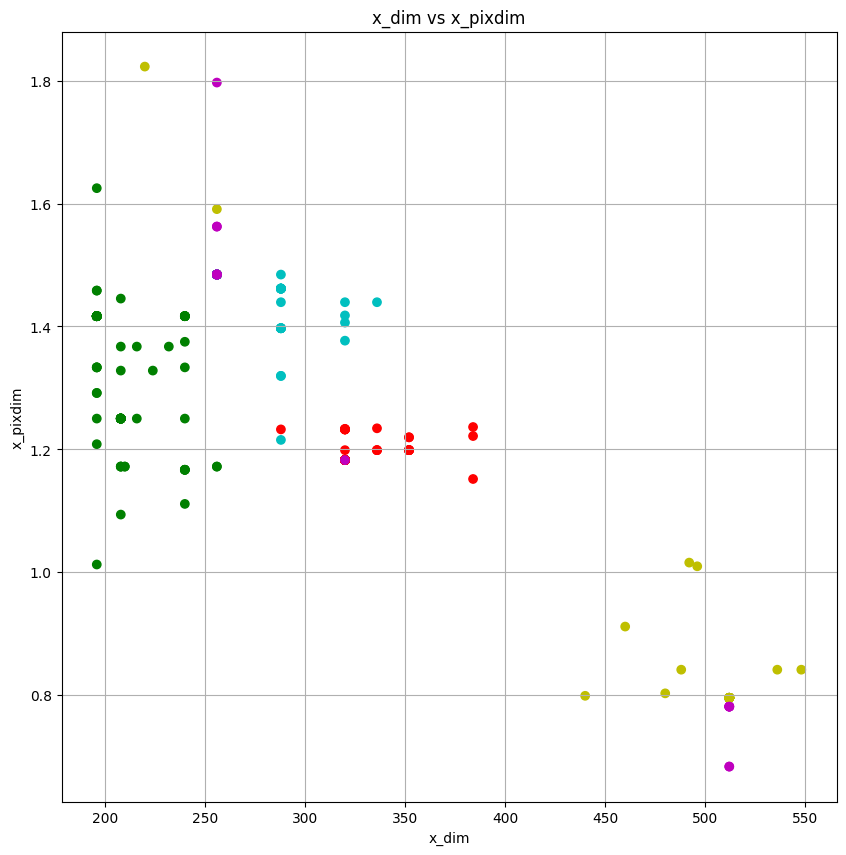

In [24]:
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
# plot the x_pixdim wrt x_dim and y_pixdim wrt y_dim
plt.figure(figsize=(10, 10))
plt.scatter(metadata.x_dim, metadata.x_pixdim, c=[colors[centre] for centre in metadata.Centre])
# plt.scatter(y_dim, y_pixdim, label='y_pixdim')
plt.xlabel('x_dim')
plt.ylabel('x_pixdim')
plt.title('x_dim vs x_pixdim')
plt.grid()
plt.show()

